In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

#***Load the dataset:-***

In [ ]:
#load dataset
df=pd.read_csv("/content/final_test.csv")

In [ ]:
df.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [ ]:
#shape of dataset
df.shape

(119734, 4)

#***EDA(Explotary Data Analysis):-***

In [ ]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119734 non-null  int64  
 1   age     119477 non-null  float64
 2   height  119404 non-null  float64
 3   size    119734 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB


In [ ]:
#dataset describe
df.describe()

,weight,age,height
count,119734.000000,119477.000000,119404.000000
mean,61.756811,34.027311,165.805794
std,9.944863,8.149447,6.737651
min,22.000000,0.000000,137.160000
25%,55.000000,29.000000,160.020000
50%,61.000000,32.000000,165.100000
75%,67.000000,37.000000,170.180000
max,136.000000,117.000000,193.040000


In [ ]:
#dataset missing values
df.isnull().sum()

,0
weight,0
age,257
height,330
size,0


In [ ]:
#drop the missing values
df.dropna(inplace=True)

In [ ]:
#check the missing vales
df.isnull().sum().any()

False

In [ ]:
#check the duplicated rows
df.duplicated().sum()

92182

In [ ]:
#drop the duplicated rows
df.drop_duplicates(inplace=True)

#***Data Preprocessing:-***

In [ ]:
#data preprocessing
df["bmi"] = df["height"]/df["weight"]

In [ ]:
df

,weight,age,height,size,bmi
0,62,28.0,172.72,XL,2.785806
1,59,36.0,167.64,L,2.841356
2,61,34.0,165.10,M,2.706557
3,65,27.0,175.26,L,2.696308
4,62,45.0,172.72,M,2.785806
...,...,...,...,...,...
119683,59,54.0,157.48,L,2.669153
119708,79,32.0,160.02,L,2.025570
119715,65,28.0,172.72,XXS,2.657231
119720,58,35.0,167.64,XXXL,2.890345


In [ ]:
#shape of dataset
df.shape

(26971, 5)

#***Data Visualization:-***

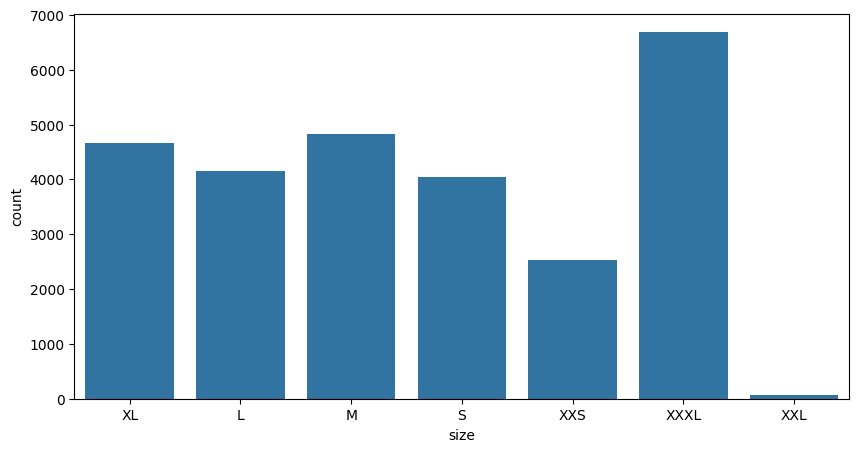

In [ ]:
#target column barchert
plt.figure(figsize=(10,5))
sns.countplot(x=df['size'])
plt.show()

In [ ]:
#numerical column
num_col=df.select_dtypes(include=np.number).columns
num_col

Index(['weight', 'age', 'height', 'bmi'], dtype='object')

<Figure size 1000x500 with 0 Axes>

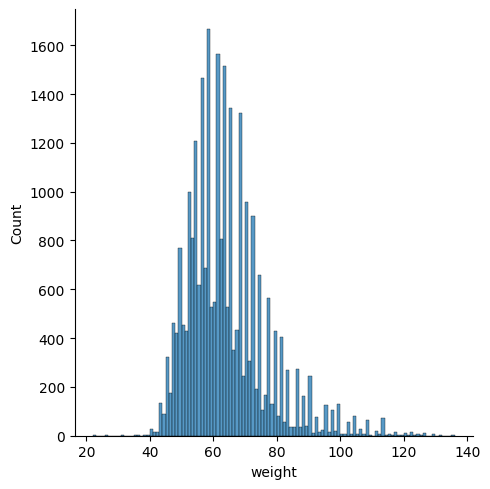

<Figure size 1000x500 with 0 Axes>

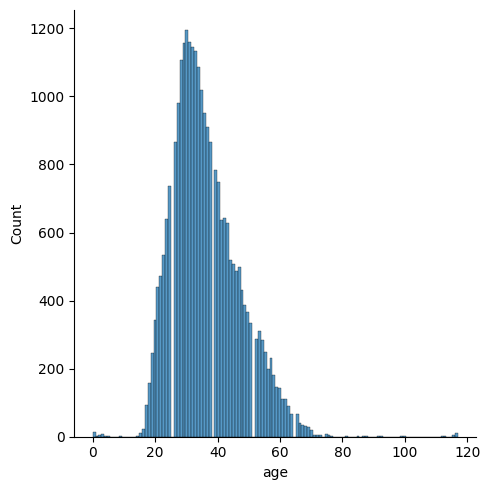

<Figure size 1000x500 with 0 Axes>

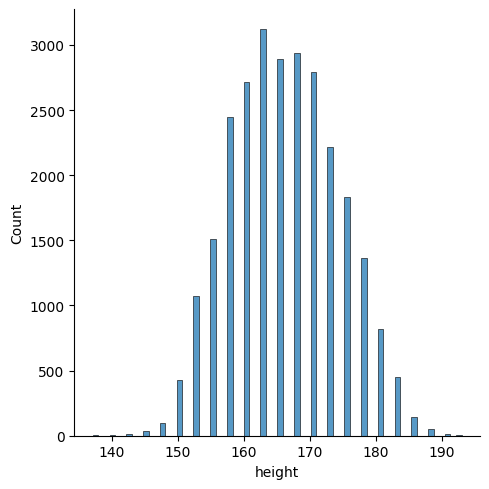

<Figure size 1000x500 with 0 Axes>

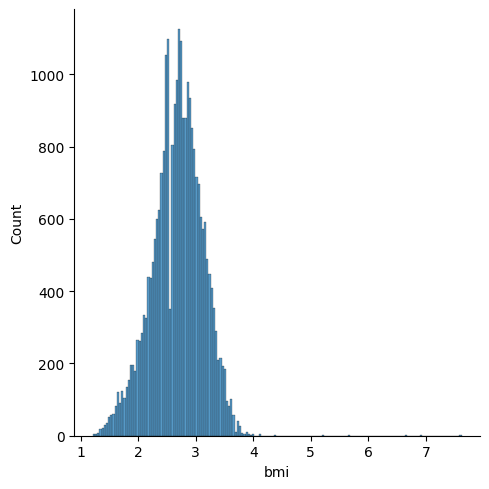

In [ ]:
#nuymerical column distribution chart
for col in num_col:
  plt.figure(figsize=(10,5))
  sns.displot(df[col])
  plt.show()

In [ ]:
df['size'].value_counts()

,count
size,
XXXL,6687
M,4822
XL,4655
L,4160
S,4042
XXS,2538
XXL,67


#`convert categorical to columns:-`

In [ ]:
df['size'] = df['size'].map({'XXS': 1, 'S': 2, "M" : 3, "L" : 4, "XL" : 5, "XXL" : 6, "XXXL" : 7})

In [ ]:
df

,weight,age,height,size,bmi
0,62,28.0,172.72,5,2.785806
1,59,36.0,167.64,4,2.841356
2,61,34.0,165.10,3,2.706557
3,65,27.0,175.26,4,2.696308
4,62,45.0,172.72,3,2.785806
...,...,...,...,...,...
119683,59,54.0,157.48,4,2.669153
119708,79,32.0,160.02,4,2.025570
119715,65,28.0,172.72,1,2.657231
119720,58,35.0,167.64,7,2.890345


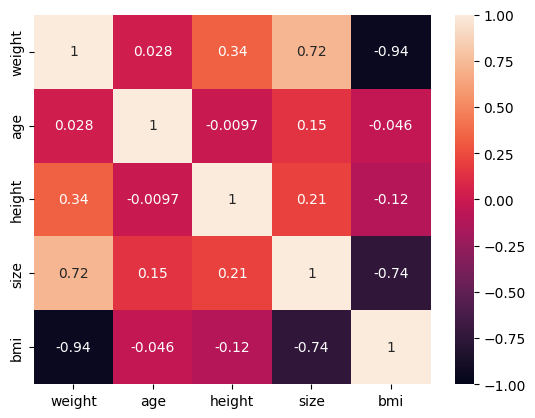

In [56]:
#heatmap correlation
sns.heatmap(df.corr(), vmin=-1, annot=True)
plt.show()

#***Spliting the dataset:-***

In [ ]:
X = df.drop('size',axis=1)
y=df['size']

In [ ]:
#spliting the dataset train ,test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [57]:
#sacaled the datset
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [58]:
# Checking dimensions on the train and test data
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (21576, 4)
X_test:  (5395, 4)
y_train:  (21576,)
y_test:  (5395,)


#***Building the model:-***

#`random forest classifier:-`

In [ ]:
model=RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Accuracy score of model:-",accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.15      0.15      0.15       525
           2       0.09      0.10      0.10       805
           3       0.07      0.08      0.08       958
           4       0.04      0.03      0.03       853
           5       0.06      0.06      0.06       913
           6       0.00      0.00      0.00        13
           7       0.56      0.56      0.56      1328

    accuracy                           0.20      5395
   macro avg       0.14      0.14      0.14      5395
weighted avg       0.20      0.20      0.20      5395

[[ 81 264 108  34  26   0  12]
 [245  81 286  92  73   0  28]
 [128 285  74 224 176   2  69]
 [ 46 128 258  28 248   3 142]
 [ 20  72 188 247  56   2 328]
 [  0   0   4   1   3   0   5]
 [  9  32  79 140 320   3 745]]
Accuracy score of model:- 0.1974050046339203


#`KNN:-`

In [59]:
#Fitting K-NN classifier to the training set
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=7, metric='manhattan', weights= 'distance')
knn.fit(X_train, y_train)


KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

In [61]:
#check the accuracy scores for training and test set
print("Training Score ",knn.score(X_train,y_train))
print("Testing Score ",knn.score(X_test,y_test))

Training Score  0.5690118650352243
Testing Score  0.1974050046339203


In [60]:
# target
y_pred = knn.predict(X_test)
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test,y_pred)*100))

print(classification_report(y_test, y_pred))

# Generate confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 19.74%
              precision    recall  f1-score   support

           1       0.10      0.16      0.12       525
           2       0.07      0.09      0.08       805
           3       0.07      0.08      0.07       958
           4       0.04      0.03      0.04       853
           5       0.10      0.06      0.08       913
           6       0.00      0.00      0.00        13
           7       0.67      0.56      0.61      1328

    accuracy                           0.20      5395
   macro avg       0.15      0.14      0.14      5395
weighted avg       0.22      0.20      0.21      5395

[[ 85 356  69   7   4   0   4]
 [354  76 308  41  19   0   7]
 [223 318  76 242  76   0  23]
 [117 193 253  27 195   1  67]
 [ 72 122 238 163  59   2 257]
 [  0   1   5   0   2   0   5]
 [ 20  67 135 142 219   3 742]]


#`DecisionTreeClassifier:-`

In [65]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [67]:
#check the accuracy scores for training and test set
print("Training Score ",classifier.score(X_train,y_train))
print("Testing Score ",classifier.score(X_test,y_test))

Training Score  0.5690118650352243
Testing Score  0.17664504170528267


In [66]:
#prediction
y_pred = classifier.predict(X_test)#Accuracy
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.17664504170528267


#`Multilayer Perceptron MLP:-`
deeplearning

In [62]:
#MLP neural
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
#model fitting
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)

In [64]:
#check the accuracy scores for training and test set
print("Training Score ",mlp.score(X_train,y_train))
print("Testing Score ",mlp.score(X_test,y_test))

Training Score  0.43325917686318133
Testing Score  0.4209453197405005


In [63]:
# Memprediksi nilai target
y_pred = mlp.predict(X_test)
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test,y_pred)*100))

print(classification_report(y_test, y_pred))

# Generate confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 42.09%
              precision    recall  f1-score   support

           1       0.43      0.50      0.47       525
           2       0.35      0.35      0.35       805
           3       0.30      0.29      0.29       958
           4       0.26      0.22      0.24       853
           5       0.30      0.32      0.31       913
           6       0.00      0.00      0.00        13
           7       0.69      0.74      0.71      1328

    accuracy                           0.42      5395
   macro avg       0.33      0.34      0.34      5395
weighted avg       0.41      0.42      0.42      5395

[[264 167  62  19   9   0   4]
 [217 279 183  81  34   0  11]
 [ 88 229 274 183 145   0  39]
 [ 27  81 208 187 254   0  96]
 [ 10  35 134 166 288   0 280]
 [  0   0   1   1   4   0   7]
 [  3   4  43  75 224   0 979]]


#`Artificial Neural Networks(ANN):-`

In [78]:
# datatype of y is object which ML model will not be able to understand and process.
# We will use LabelEncoder and to_categorical methods of sklearn and keras respectively to
from tensorflow.keras.utils import to_categorical
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_encoded = to_categorical(y_encoded)
y_encoded

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [79]:
# Split training and test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.20 , random_state=1)

In [81]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
# creating the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),  # Change input_shape to (4,)
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Assuming binary classification
])

# first hidden layer
model.add(Dense(7, activation = 'relu', input_dim = 3))

# second hidden layer
model.add(Dense(7, activation = 'relu'))

# output layer
model.add(Dense(7, activation = 'softmax'))

# Compiling the NN
# binary_crossentropy loss function used when a binary output is expected
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()
# earlystop is used to avoid overfitting of the model on training data.It is used to monitor
# the performence of the model during training.It allows us to choose the large number of epochs
# and stop training once the model performence stop improving on the validation data

early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose = 1, patience=20)
# fitting the model to training data
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=300, callbacks=[early_stop])

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              33 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 7)                   │              14 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 7)                   │              56 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,559 (10.00 KB)

 Trainable params: 2,559 (10.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
675/675 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1807 - loss: 1.8955 - val_accuracy: 0.2441 - val_loss: 1.7711
Epoch 2/300
675/675 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2462 - loss: 1.7687 - val_accuracy: 0.2441 - val_loss: 1.7672
Epoch 3/300
675/675 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2499 - loss: 1.7662 - val_accuracy: 0.2441 - val_loss: 1.7665
Epoch 4/300
675/675 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2502 - loss: 1.7693 - val_accuracy: 0.2441 - val_loss: 1.7675
Epoch 5/300
675/675 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2434 - loss: 1.7721 - val_accuracy: 0.2441 - val_loss: 1.7668
Epoch 6/300
675/675 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2488 - loss: 1.7671 - val_accuracy: 0.2441 - val_loss: 1.7664
Epoch 7/300
675/675 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2465 - loss: 1.7717 - val_accuracy: 0.2441 - val_loss: 1.7672
Epoch 8/300
675/675 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2475 - loss: 1.7720 - val_accu

#***Save the model:-***
save the best model according to accuracy mlp

In [ ]:
import pickle
with open('mlp_model.pkl','wb') as files:
  pickle.dump(mlp,files);